D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


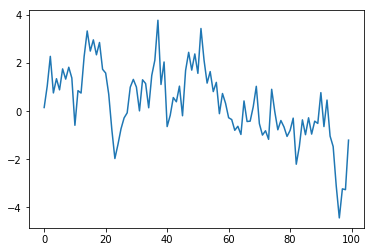

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

n = 100
eps = np.random.normal(scale=1, size=n)
psi = 0.8

x = eps.copy()
for i in range(n-1):
    x[i+1] += psi * x[i]
    
plt.plot(x)

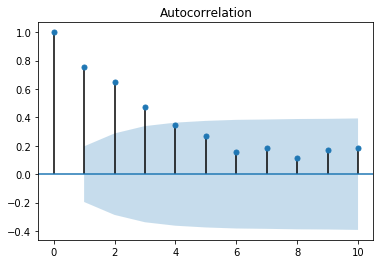

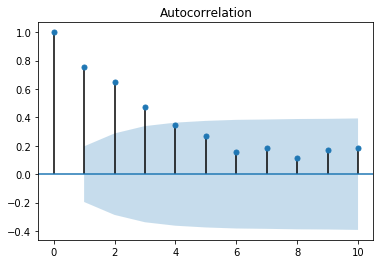

In [4]:
sm.tsa.graphics.plot_acf(x, lags=10)

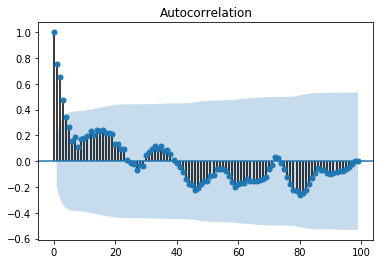

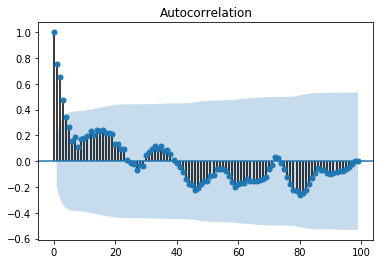

In [8]:
sm.tsa.graphics.plot_acf(x, lags=99, alpha=0.05)

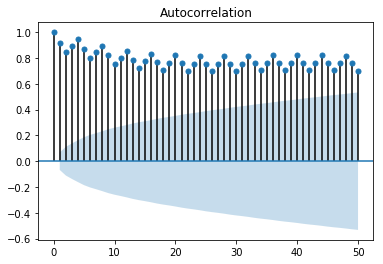

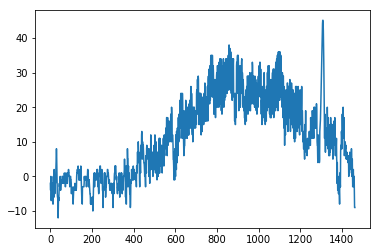

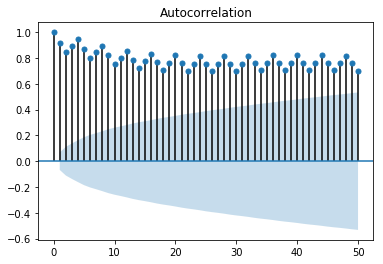

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
import statsmodels.api as sm
 
df = pd.read_csv(
        'D:/Downloads/weather.csv.gz',
        sep=';',
        comment='#',
        index_col=False
)
df = df[np.isfinite(df['T'])]
df['dt'] = pd.to_datetime(df[df.columns[0]],dayfirst=True)
df['ts'] = df['dt'].map(lambda x: x.timestamp())
 
spline = CubicSpline(df['ts'][::-1], df['T'][::-1])
 
d_hour = 6
ts_ = np.arange(df['ts'].iloc[-1],
                df['ts'].iloc[0],
                d_hour * 3600)
T_all = spline(ts_)
plt.plot(T_all)
 
cut_points = 5 * 24  // d_hour
 
T_ = T_all[:-cut_points]
sm.graphics.tsa.plot_acf(T_, lags=50, alpha=0.01)

[  1.03500080e+01   7.81927961e-01  -7.39466729e-02   1.69554383e-01
   5.63472348e-01  -5.34971722e-01  -9.50728410e-02   6.83989247e-04
   1.73543038e-01]


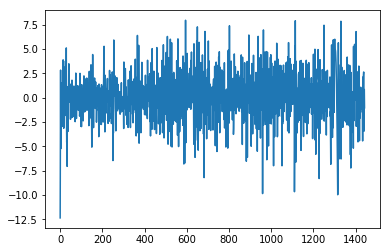

In [34]:
ar = sm.tsa.ARMA(T_, (8,0))
model = ar.fit()
errors = ar.geterrors(model.params)
print(model.params)
plt.plot(errors)

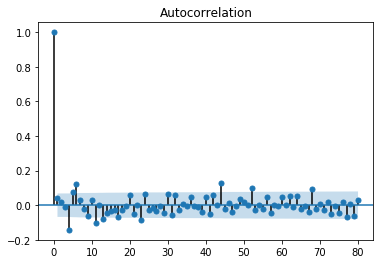

<Figure size 432x288 with 0 Axes>

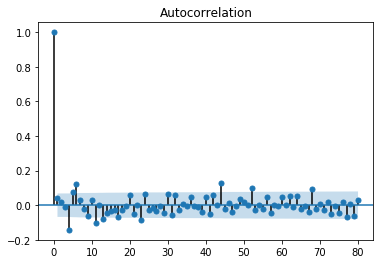

In [35]:
plt.figure()
sm.graphics.tsa.plot_acf(errors, lags=80, alpha=0.01)

3.2739904962697435

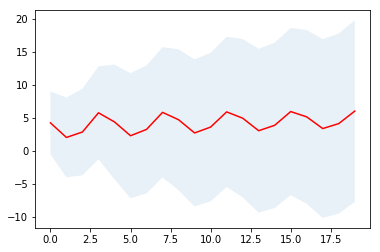

In [36]:
forecast, f_err, f_conf = model.forecast(cut_points, alpha=0.05)
plt.plot(forecast, '-', color='red')
plt.fill_between(np.arange(cut_points), *f_conf.T, alpha=0.1)
np.linalg.norm(forecast[:4]- T_all[-cut_points:-cut_points+4])